In [44]:

# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib
# import numpy as np


matplotlib.style.use('ggplot')

# Do * NOT * alter this line, until instructed!

# TODO: Load up the dataset and remove any and all rows that have a nan. You should be a pro at this
# by now ;-)
#
# .. your code here ..
df = pd.read_csv('kidney_disease.csv')
df.dropna(axis = 0, how = 'any', inplace = True)
#print df.head()

# Create some color coded labels; the actual label feature will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

# TODO: Use an indexer to select only the following columns:
#       ['bgr','wc','rc']
#
# .. your code here ..
df = df[['bgr', 'wc', 'rc']]



# data = pd.read_csv('kidney_disease.csv')


# df = pd.DataFrame(data[['rc','bgr','wc']])

# data.head()


df.bgr = pd.to_numeric(df.bgr, errors = 'coerce')
df.wc = pd.to_numeric(df.wc, errors = 'coerce')
df.rc = pd.to_numeric(df.rc, errors = 'coerce')

# df.dropna(axis = 0, how = 'any', inplace = True)

# df.describe()



In [39]:
print df.var()
#print "This is the describe output: ", df.describe()

bgr    4.217182e+03
wc     9.777380e+06
rc     1.039104e+00
dtype: float64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import assignment2_helper as helper
# Look pretty...
matplotlib.style.use('ggplot')
# Do * NOT * alter this line, until instructed!
scaleFeatures = False

if scaleFeatures: df = helper.scaleFeatures(df)


from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df)
T = pca.transform(df)
T

array([[ -7.29174793e+02,  -1.92112901e+01],
       [ -1.82918167e+03,  -1.83905789e+01],
       [ -1.22923563e+03,  -3.20198303e+01],
       [ -7.29380518e+02,  -6.62079558e+01],
       [ -1.62790082e+03,   2.73725708e+02],
       [  1.07088247e+03,  -1.00889457e+01],
       [  3.57056079e+03,  -8.90332535e+01],
       [ -4.02800907e+03,   2.54238563e+02],
       [  3.67116406e+03,   4.85278117e+01],
       [  2.47095233e+03,   2.78543631e+00],
       [ -4.72933330e+03,  -4.66886250e+01],
       [  2.87141248e+03,   1.07026849e+02],
       [ -3.22924266e+03,  -2.92597312e+01],
       [  6.71039597e+02,   2.66645696e+01],
       [ -1.62927987e+03,  -4.12643106e+01],
       [ -1.29237359e+02,  -3.48332795e+01],
       [  1.77095456e+03,   4.84581681e+00],
       [  1.07143413e+03,   1.15908837e+02],
       [ -7.29236006e+02,  -3.32071355e+01],
       [  1.07097441e+03,   1.09107395e+01],
       [  1.27145842e+03,   1.21030412e+02],
       [ -1.62909592e+03,   7.38018449e-01],
       [  

In [7]:
import math
import pandas as pd
from sklearn import preprocessing

# A Note on SKLearn .transform() calls:
#
# Any time you transform your data, you lose the column header names. This actually makes complete sense. There are essentially two
# types of transformations, those that change the scale of your features, and those that change your features entirely. Changing the
# scale would be like changing centimeters to inches. Changing the features would be like using PCA to reduce 300 columns to 30. In
# either case, the original column's units have been altered or no longer exist, so it's up to you to rename your columns after ANY
# transformation. Due to this, SKLearn returns an NDArray from *transform() calls.

def scaleFeatures(df):
  # SKLearn has many different methods for doing transforming your features by scaling them (this is a type of pre-processing).
  # RobustScaler, Normalizer, MinMaxScaler, MaxAbsScaler, StandardScaler...
  # http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
  #
  # However in order to be effective at PCA, there are a few requirements that must be met, and which will drive the selection of
  # your scaler. PCA required your data is standardized -- in other words it's mean is equal to 0, and it has ~unit variance.
  #
  # SKLearn's regular Normalizer doesn't zero out the mean of your data, it only clamps it, so it's inappropriate to use here
  # (depending on your data). MinMaxScaler and MaxAbsScaler both fail to set a unit variance, so you won't be using them either.
  # RobustScaler can work, again depending on your data (watch for outliers). For these reasons we're going to use the StandardScaler.
  # Get familiar with it by visiting these two websites:
  #
  # http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler
  #
  # http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
  #


  # ---------
  # Feature scaling is the type of transformation that only changes the scale and not number of features, so we'll use the original
  # dataset column names. However we'll keep in mind that the _units_ have been altered:
  scaled = preprocessing.StandardScaler().fit_transform(df)
  scaled = pd.DataFrame(scaled, columns=df.columns)
  print "New Variances:\n", scaled.var()
  print "New Describe:\n", scaled.describe()
  return scaled


def drawVectors(transformed_features, components_, columns, plt, scaled):
  if not scaled:
    return plt.axes() # No cheating ;-)

  num_columns = len(columns)

  # This funtion will project your *original* feature (columns) onto your principal component feature-space, so that you can
  # visualize how "important" each one was in the multi-dimensional scaling
  
  # Scale the principal components by the max value in the transformed set belonging to that component
  xvector = components_[0] * max(transformed_features[:,0])
  yvector = components_[1] * max(transformed_features[:,1])

  ## visualize projections

  # Sort each column by it's length. These are your *original* columns, not the principal components.
  important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
  important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
  print "Features by importance:\n", important_features

  ax = plt.axes()

  for i in range(num_columns):
    # Use an arrow to project each original feature as a labeled vector on your principal component axes
    plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
    plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

  return ax

In [11]:
df.dtypes


rc     float64
bgr    float64
wc       int64
dtype: object

In [40]:
df.var()

bgr    4.217182e+03
wc     9.777380e+06
rc     1.039104e+00
dtype: float64

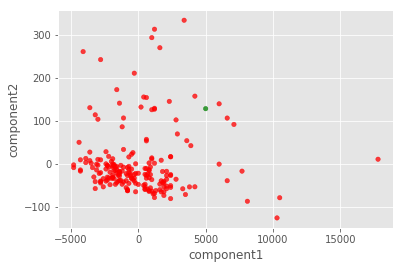

In [12]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# pca.fit(df)
# T = pca.transform(df)
# scaleFeatures = False



ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show()

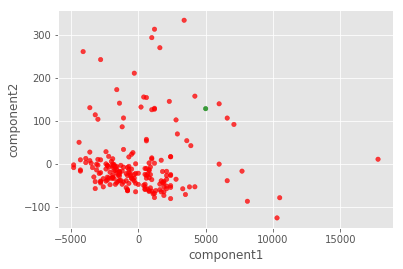

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import assignment2_helper as helper
# Look pretty...
matplotlib.style.use('ggplot')
df = pd.read_csv('kidney_disease.csv')
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

df.drop(labels = ['id', 'classification'], axis = 1, inplace = True)
df.head()

df.pcv = pd.to_numeric(df.pcv, errors = 'coerce')
df.wc = pd.to_numeric(df.wc,errors = 'coerce')
df.rc = pd.to_numeric(df.rc,errors = 'coerce')

df = pd.get_dummies(df,columns=['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane'])

df.dtypes


df.dropna(axis = 0, how = 'any', inplace = True)

df.describe()
df.var()

if scaleFeatures: df = helper.scaleFeatures(df)
    
from sklearn.decomposition import pca
pca = PCA(n_components = 2)
pca.fit(df)
T = pca.transform(df)

ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c = labels, alpha=0.75, ax=ax)
plt.show()


In [21]:
df.head()
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wc       float64
rc       float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object